In [87]:
import pandas as pd
import yfinance as yahoo
import matplotlib.pyplot as plt

In [88]:
merval = yahoo.download(tickers="BMA.BA CEPU.BA CRES.BA "
                              "EDN.BA GGAL.BA IRSA.BA LOMA.BA "
                              "PAMP.BA SUPV.BA TECO2.BA TGSU2.BA YPFD.BA ARS=X ", period="2y")['Adj Close']


[*********************100%***********************]  13 of 13 completed


In [89]:
merval = merval.rename(columns={'BMA.BA':'BMABA', 'CEPU.BA':'CEPUBA', 'CRES.BA': 'CRESBA', 'EDN.BA':'EDNBA',
                            'GGAL.BA':'GGALBA', 'IRSA.BA':'IRSABA', 'LOMA.BA':'LOMABA', 'PAMP.BA':'PAMPBA',
                            'SUPV.BA':'SUPVBA', 'TECO2.BA':'TECO2BA', 'TGSU2.BA':'TGSU2BA', 'YPFD.BA':'YPFDBA',
                            'ARS=X':'USDARS'})

merval = merval.fillna(method='ffill')

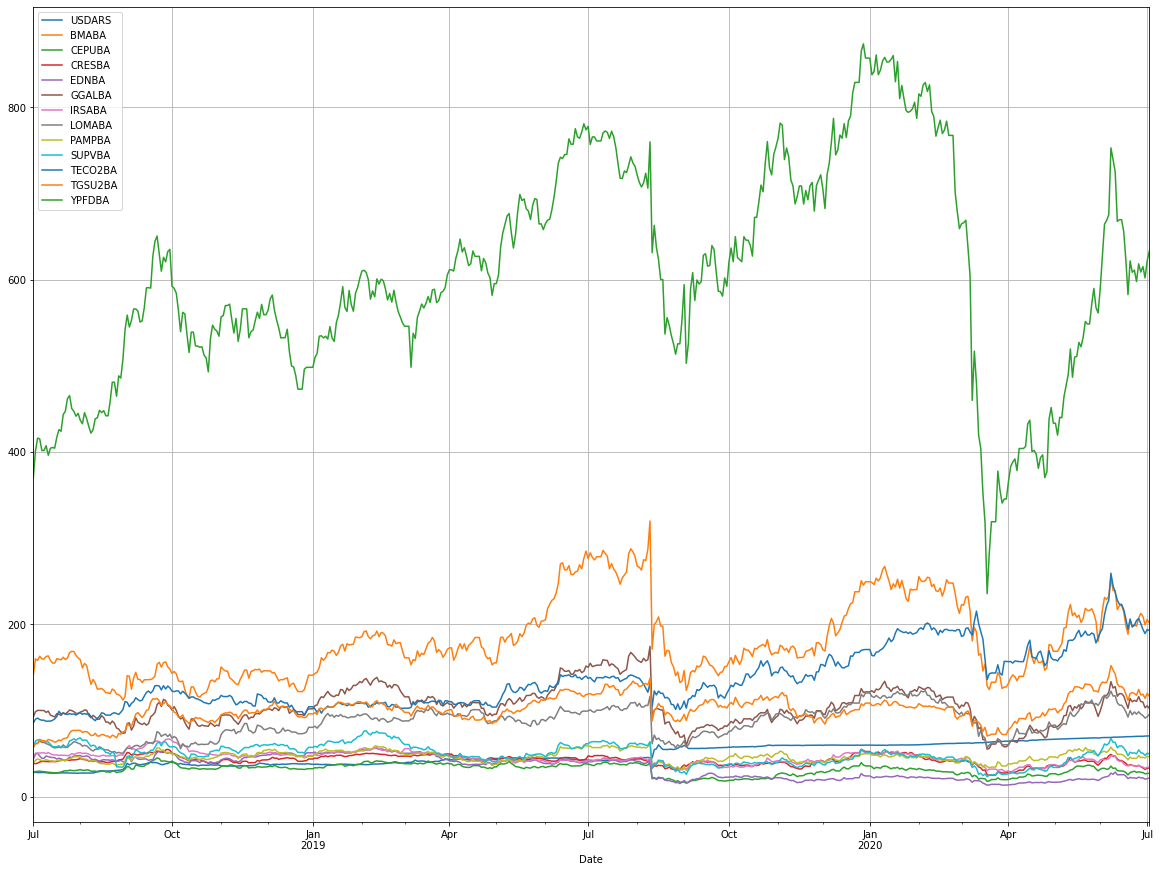

In [90]:
cotizacion_historica = merval.plot(figsize=(20,15))
cotizacion_historica.grid()

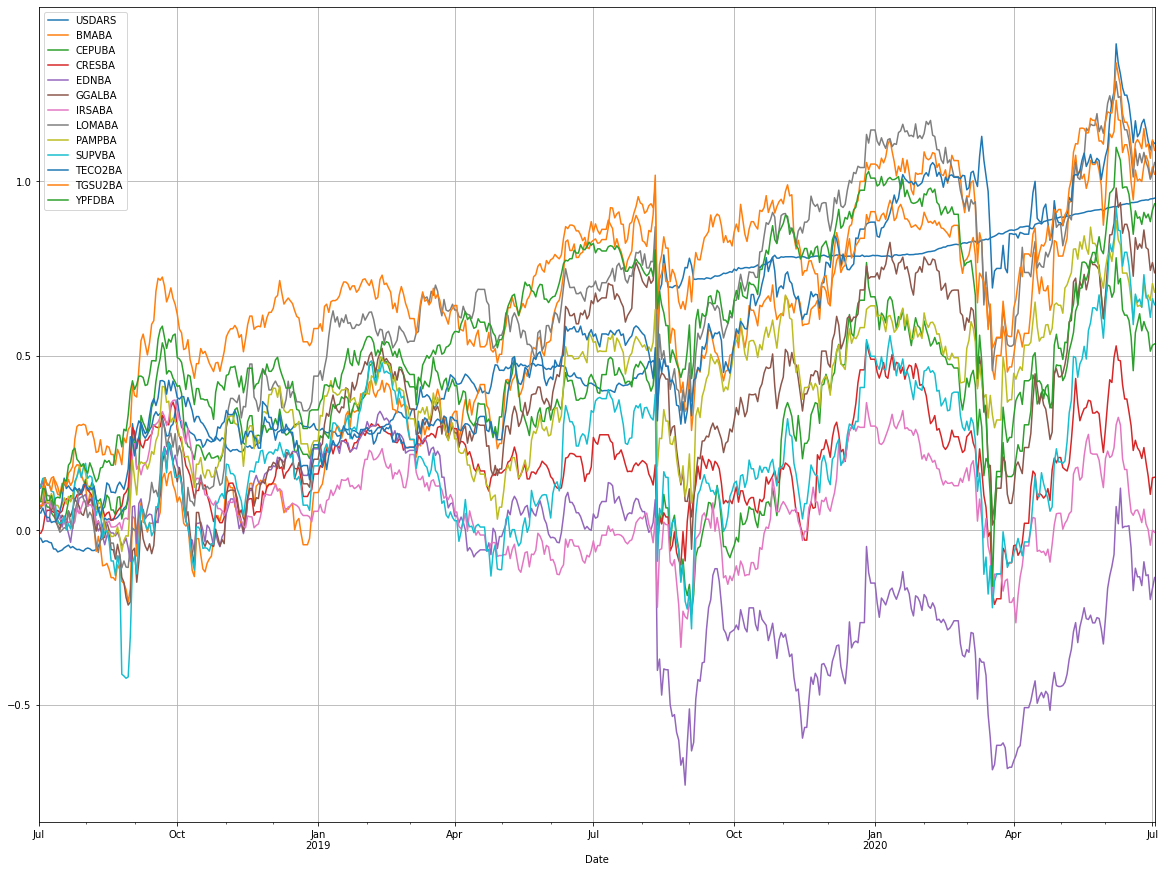

In [91]:
rentabilidad = merval.pct_change().cumsum().plot(figsize=(20,15))
rentabilidad.grid()

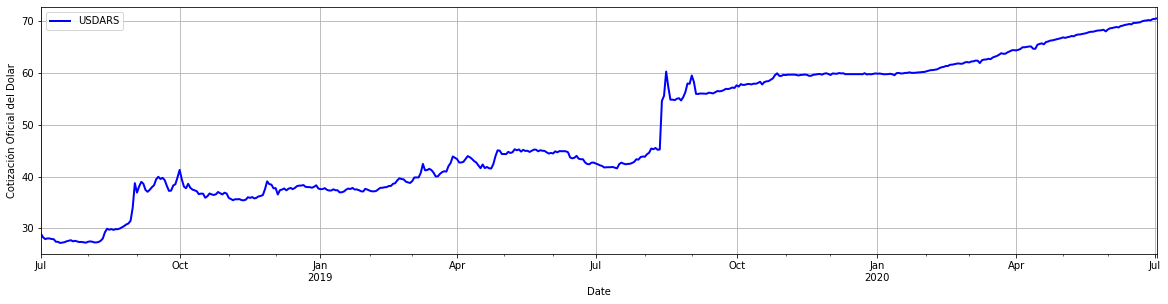

In [92]:
fig = plt.figure(figsize=(20,10))
ax1 = fig.add_subplot(211, ylabel='Cotización Oficial del Dolar')
merval.USDARS.plot(ax=ax1, color='b', lw=2., legend=True)
ax1.grid()
plt.show()

In [93]:
# Incorporamos los ADRs y así el dolar que esta operando el mercado
data = yahoo.download(tickers="BMA BMA.BA CEPU CEPU.BA  CRESY CRES.BA "
                              "EDN EDN.BA GGAL GGAL.BA IRS IRSA.BA LOMA LOMA.BA PAM "
                              " PAMP.BA SUPV SUPV.BA TEO TECO2.BA TGS TGSU2.BA YPF YPFD.BA ARS=X", period="2y")['Adj Close']

data = data.rename(columns={'BMA.BA':'BMABA', 'CEPU.BA':'CEPUBA', 'CRES.BA': 'CRESBA', 'EDN.BA':'EDNBA',
                            'GGAL.BA':'GGALBA', 'IRSA.BA':'IRSABA', 'LOMA.BA':'LOMABA', 'PAMP.BA':'PAMPBA',
                            'SUPV.BA':'SUPVBA', 'TECO2.BA':'TECO2BA', 'TGSU2.BA':'TGSU2BA', 'YPFD.BA':'YPFDBA',
                            'ARS=X':'USDARS'})

data = data.fillna(method='ffill')

cable = pd.DataFrame(data=None)

cable['BMA'] = (data.BMABA / data.BMA) * 10
cable['CEPU'] = (data.CEPUBA / data.CEPU) * 10
cable['CRES'] = (data.CRESBA / data.CRESY) * 10
cable['EDN'] = (data.EDNBA / data.EDN) * 20
cable['GGAL'] = (data.GGALBA / data.GGAL) * 10
cable['IRSA'] = (data.IRSABA / data.IRS) * 10
cable['LOMA'] = (data.LOMABA / data.LOMA) * 5
cable['PAMP'] = (data.PAMPBA / data.PAM) * 25
cable['SUPV'] = (data.SUPVBA / data.SUPV) * 5
cable['TECO2'] = (data.TECO2BA / data.TEO) * 5
cable['TGSU2'] = (data.TGSU2BA / data.TGS) * 5
cable['YPF'] = (data.YPFDBA / data.YPF)


[*********************100%***********************]  25 of 25 completed


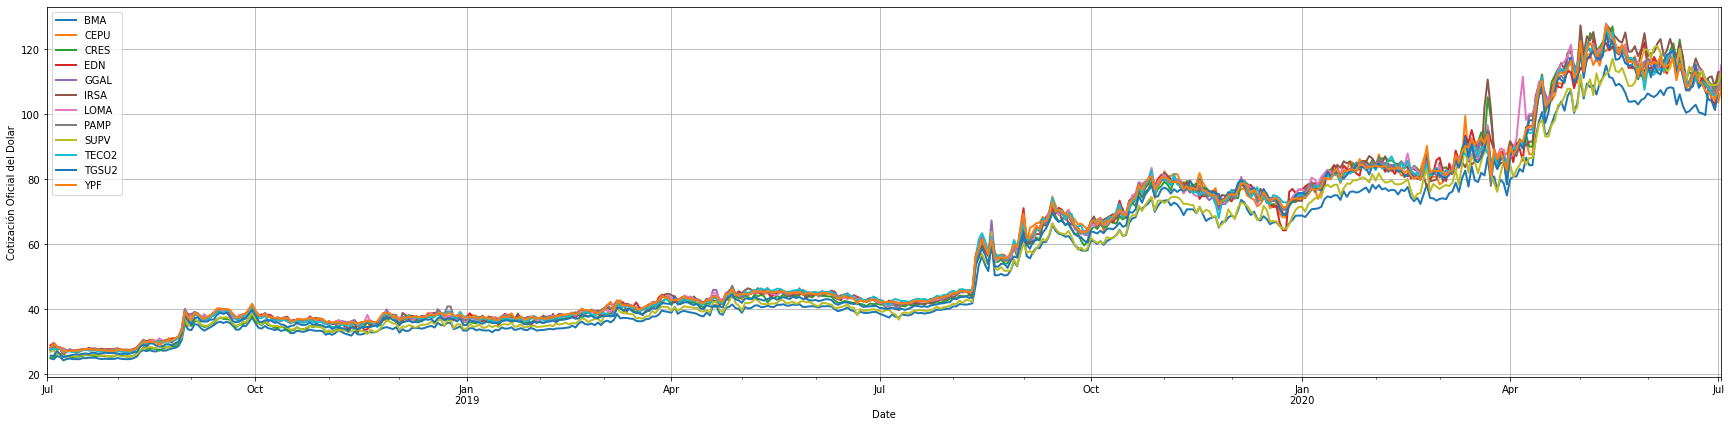

In [94]:
fig = plt.figure(figsize=(30,15))
ax1 = fig.add_subplot(211, ylabel='Cotización Oficial del Dolar')
cable.plot(ax=ax1, lw=2., legend=True)
ax1.grid()
plt.show()

In [95]:
mervaladj = pd.DataFrame(None)
mervaladj['BMABA'] = merval.BMABA / cable.BMA
mervaladj['CEPUBA'] = merval.CEPUBA / cable.CEPU
mervaladj['CRESBA'] = merval.CRESBA / cable.CRES
mervaladj['EDNBA'] = merval.EDNBA / cable.EDN
mervaladj['GGALBA'] = merval.GGALBA / cable.GGAL
mervaladj['IRSABA'] = merval.IRSABA / cable.IRSA
mervaladj['LOMABA'] = merval.LOMABA / cable.LOMA
mervaladj['SUPVBA'] = merval.SUPVBA / cable.SUPV
mervaladj['TECO2BA'] = merval.TECO2BA / cable.TECO2
mervaladj['TGSU2BA'] = merval.TGSU2BA / cable.TGSU2
mervaladj['YPFDBA'] = merval.YPFDBA / cable.YPF

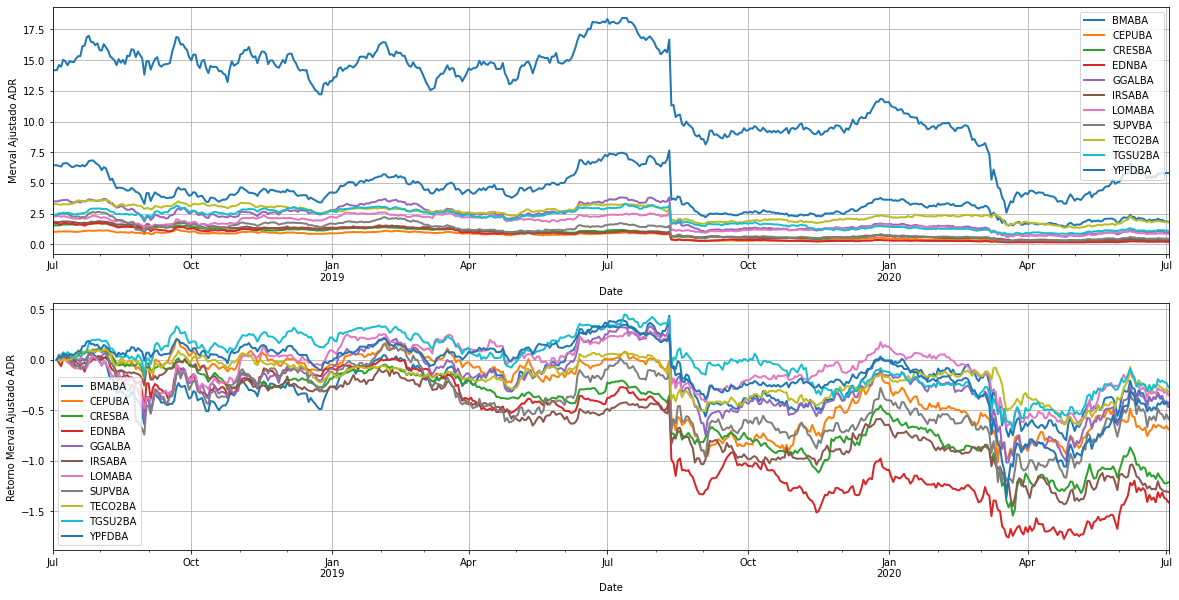

In [96]:
fig = plt.figure(figsize=(20,10))
ax1 = fig.add_subplot(211, ylabel='Merval Ajustado ADR')
mervaladj.plot(ax=ax1, lw=2., legend=True)
ax1.grid()
ax2 = fig.add_subplot(212, ylabel='Retorno Merval Ajustado ADR')
mervaladj.pct_change().cumsum().plot(ax=ax2, lw=2., legend=True)
ax2.grid()
plt.show()

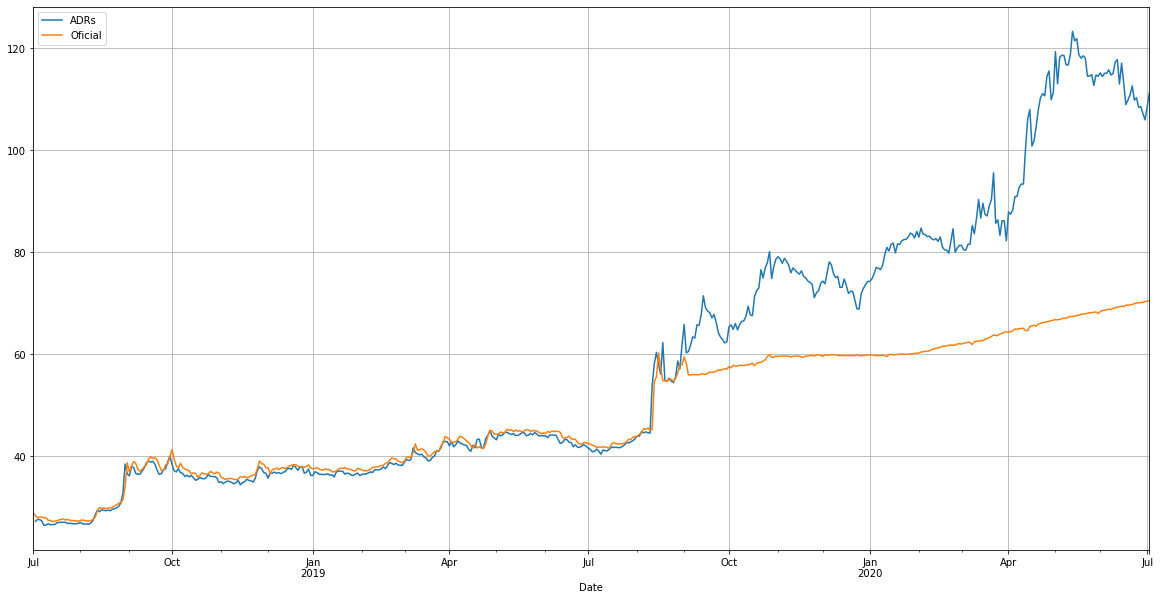

In [98]:
Brecha = pd.DataFrame()
Brecha['ADRs'] = (cable.BMA + cable.CEPU + cable.CRES + cable.EDN 
                  + cable.GGAL + cable.IRSA + cable.LOMA + cable.PAMP + 
                  cable.SUPV + cable.TECO2 + cable.TGSU2 + cable.YPF) / 12
Brecha['Oficial'] = merval.USDARS
brecha = Brecha.plot(figsize=(20,10))
brecha.grid()

In [99]:
data = yahoo.download(tickers="AAPL AAPL.BA ABT ABT.BA AIG AIG.BA AMD AMD.BA "
            "AMZN AMZN.BA BA BA.BA BABA BABA.BA  BMY BMY.BA BBD BBD.BA BBVA BBV.BA C "
            "C.BA CVX CVX.BA DIS DISN.BA DESP ERJ ERJ.BA DESP.BA FB FB.BA GE GE.BA " 
            "GLOB GLNT.BA GOLD GOLD.BA GOOGL GOOGL.BA GS GS.BA HPQ HPQ.BA JPM JPM.BA "
            "KO KO.BA MELI MELI.BA MRK MRK.BA MMM MMM.BA MSFT MSFT.BA NEM NEM.BA NFLX NFLX.BA "
            "PBR PBR.BA PG PG.BA SAN RIO.BA TSLA TSLA.BA TRIP TRIP.BA V V.BA "
            "VALE VALE.BA WFC WFC.BA WMT WMT.BA X X.BA", period="2y")['Adj Close']

data = data.fillna(method='ffill')

data = data.rename(columns={'AAPL.BA': 'AAPLBA','ABT.BA':'ABTBA', 'AIG.BA':'AIGBA', 'AMD.BA':'AMDBA',
                            'AMZN.BA':'AMZNBA', 'BA.BA':'BAB', 'BABA.BA':'BABABA',
                            'BMY.BA':'BMYBA', 'BBD.BA':'BBDBA','BBV.BA':'BBVBA','C.BA':'CBA',
                            'CVX.BA':'CVXBA','DISN.BA':'DISNBA','DESP.BA':'DESPBA','ERJ.BA':'ERJBA','FB.BA':'FBBA',
                            'GE.BA':'GEBA','GOLD.BA':'GOLDBA','GOOGL.BA':'GOOGLBA','GS.BA':'GSBA', 'GLNT.BA':'GLNTBA',
                            'HPQ.BA':'HPQBA','JPM.BA':'JPMBA','KO.BA':'KOBA','MELI.BA':'MELIBA',
                            'MRK.BA':'MRKBA','MMM.BA':'MMMBA','MSFT.BA':'MSFTBA','NEM.BA':'NEMBA',
                            'PG.BA':'PGBA','NFLX.BA':'NFLXBA','PBR.BA':'PBRBA','RIO.BA':'RIOBA',
                            'TSLA.BA':'TSLABA','TRIP.BA':'TRIPBA','V.BA':'VBA','VALE.BA':'VALEBA',
                            'WFC.BA':'WFCBA','WMT.BA':'WMTBA','X.BA':'XBA'})

[*********************100%***********************]  80 of 80 completed


In [100]:
cedears = pd.DataFrame()

cedears['AAPL'] = (data.AAPLBA / data.AAPL) * 10
cedears['ABT'] = (data.ABTBA / data.ABT) * 2
cedears['AIG'] = (data.AIGBA / data.AIG) * 5
cedears['AMD'] = (data.AMDBA / data.AMD) / 2
cedears['AMZN'] = (data.AMZNBA / data.AMZN) * 72
cedears['BA'] = (data.BAB / data.BA) * 3
cedears['BABA'] = (data.BABABA / data.BABA) * 9
cedears['BMY'] = (data.BMYBA / data.BMY)
cedears['BBD'] = (data.BBDBA / data.BBD)
cedears['BBV'] = (data.BBVBA / data.BBVA)
cedears['C'] = (data.CBA / data.C) * 3
cedears['CVX'] = (data.CVXBA / data.CVX) * 8
cedears['DIS'] = (data.DISNBA / data.DIS) * 4
cedears['DESP'] = (data.DESPBA / data.DESP)
cedears['ERJ'] = (data.ERJBA / data.ERJ)
cedears['FB'] = (data.FBBA / data.FB) * 8
cedears['GE'] = (data.GEBA / data.GE)
cedears['GOLD'] = (data.GOLDBA / data.GOLD)
cedears['GOOGL'] = (data.GOOGLBA / data.GOOGL) * 29
cedears['GS'] = (data.GSBA / data.GS) * 13
cedears['GLOB'] = (data.GLNTBA / data.GLOB) * 2
cedears['HPQ'] = (data.HPQBA / data.HPQ)
cedears['JPM'] = (data.JPMBA / data.JPM) * 5
cedears['KO'] = (data.KOBA / data.KO) * 5
cedears['MELI'] = (data.MELIBA / data.MELI) * 2
cedears['PG'] = (data.PGBA / data.PG) * 5
cedears['MRK'] = (data.MRKBA / data.MRK) * 5
cedears['MMM'] = (data.MMMBA / data.MMM) * 5
cedears['MSFT'] = (data.MSFTBA / data.MSFT) * 5
cedears['NEM'] = (data.NEMBA / data.NEM)
cedears['NFLX'] = (data.NFLXBA / data.NFLX) * 16
cedears['PBR'] = (data.PBRBA / data.PBR)
cedears['RIO'] = (data.RIOBA / data.SAN) / 4
cedears['TSLA'] = (data.TSLABA / data.TSLA) * 15
cedears['TRIP'] = (data.TRIPBA / data.TRIP) * 2
cedears['V'] = (data.VBA / data.V) * 6
cedears['VALE'] = (data.VALEBA / data.VALE) * 2
cedears['WFC'] = (data.WFCBA / data.WFC) * 5
cedears['WMT'] = (data.WMTBA / data.WMT) * 3
cedears['X'] = (data.XBA / data.X) * 3

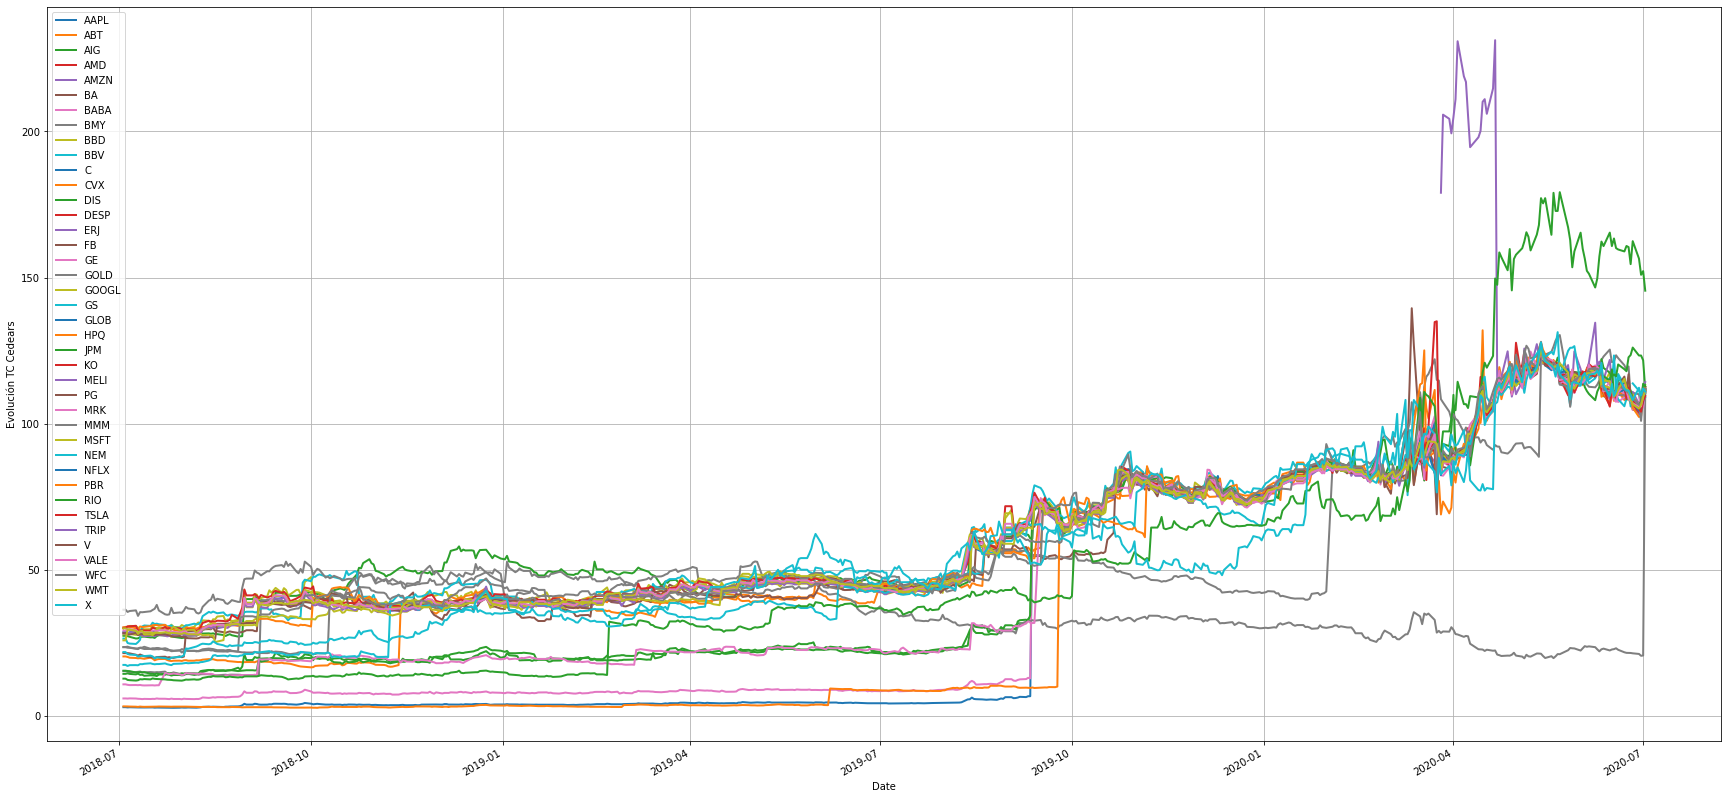

In [101]:
fig = plt.figure(figsize=(30,15))
ax1 = fig.add_subplot(111, ylabel='Evolución TC Cedears')
cedears.plot(ax=ax1, lw=2., legend=True)
ax1.grid()
plt.show()

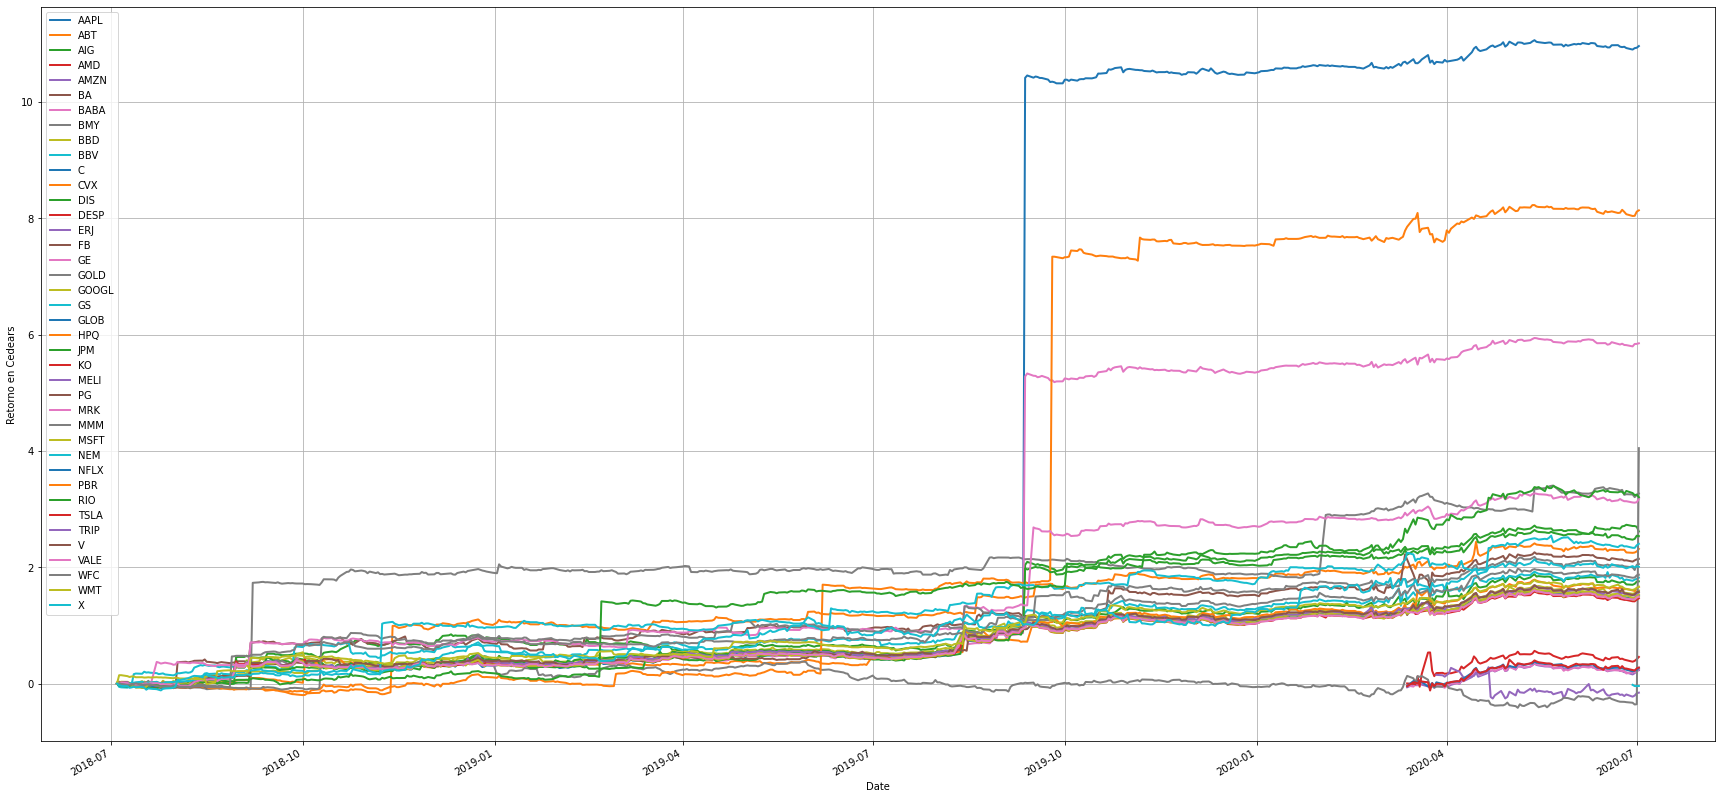

In [102]:
fig = plt.figure(figsize=(30,15))
ax1 = fig.add_subplot(111, ylabel='Retorno en Cedears')
cedears.pct_change().cumsum().plot(ax=ax1, lw=2., legend=True)
ax1.grid()
plt.show()